In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import scipy
import scipy.stats
import scipy.optimize

In [69]:
data = pd.read_csv("/home/benjamin/Masaüstü/DS/twitter_analysis/PatientSafety/ps_cleaned_toBERT.csv", low_memory=False)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100005 entries, 0 to 100004
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100005 non-null  object 
 1   date            100005 non-null  object 
 2   text            100005 non-null  object 
 3   retweetCount    99975 non-null   float64
 4   likeCount       99975 non-null   float64
 5   lang            99975 non-null   object 
 6   followersCount  99975 non-null   float64
 7   friendsCount    99975 non-null   float64
 8   location        79478 non-null   object 
 9   hashtags        62242 non-null   object 
 10  dateCreated     100005 non-null  object 
 11  year            100005 non-null  int64  
 12  month           100005 non-null  int64  
 13  day             100005 non-null  int64  
 14  dayofWeek       100005 non-null  object 
 15  hour            100005 non-null  int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 12.2+ M

In [71]:
documents = data['text'].tolist()

# Usage

In [72]:
from top2vec import Top2Vec

model = Top2Vec(documents, speed="learn", workers=4)

2022-12-02 00:07:03,497 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-12-02 00:07:06,076 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-12-02 00:09:02,696 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-12-02 00:09:31,579 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-12-02 00:09:34,404 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


# Pretrained Embedding Models

### Get Number of Topics

In [59]:

model.get_num_topics()

1220

### Get Topic Sizes

In [62]:
topic_sizes, topic_nums = model.get_topic_sizes()

### Get Topics

In [63]:
topic_words, word_scores, topic_nums = model.get_topics(10)

### Search Topics

In [64]:

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["safety"], num_topics=5)

### Generate Word Clouds

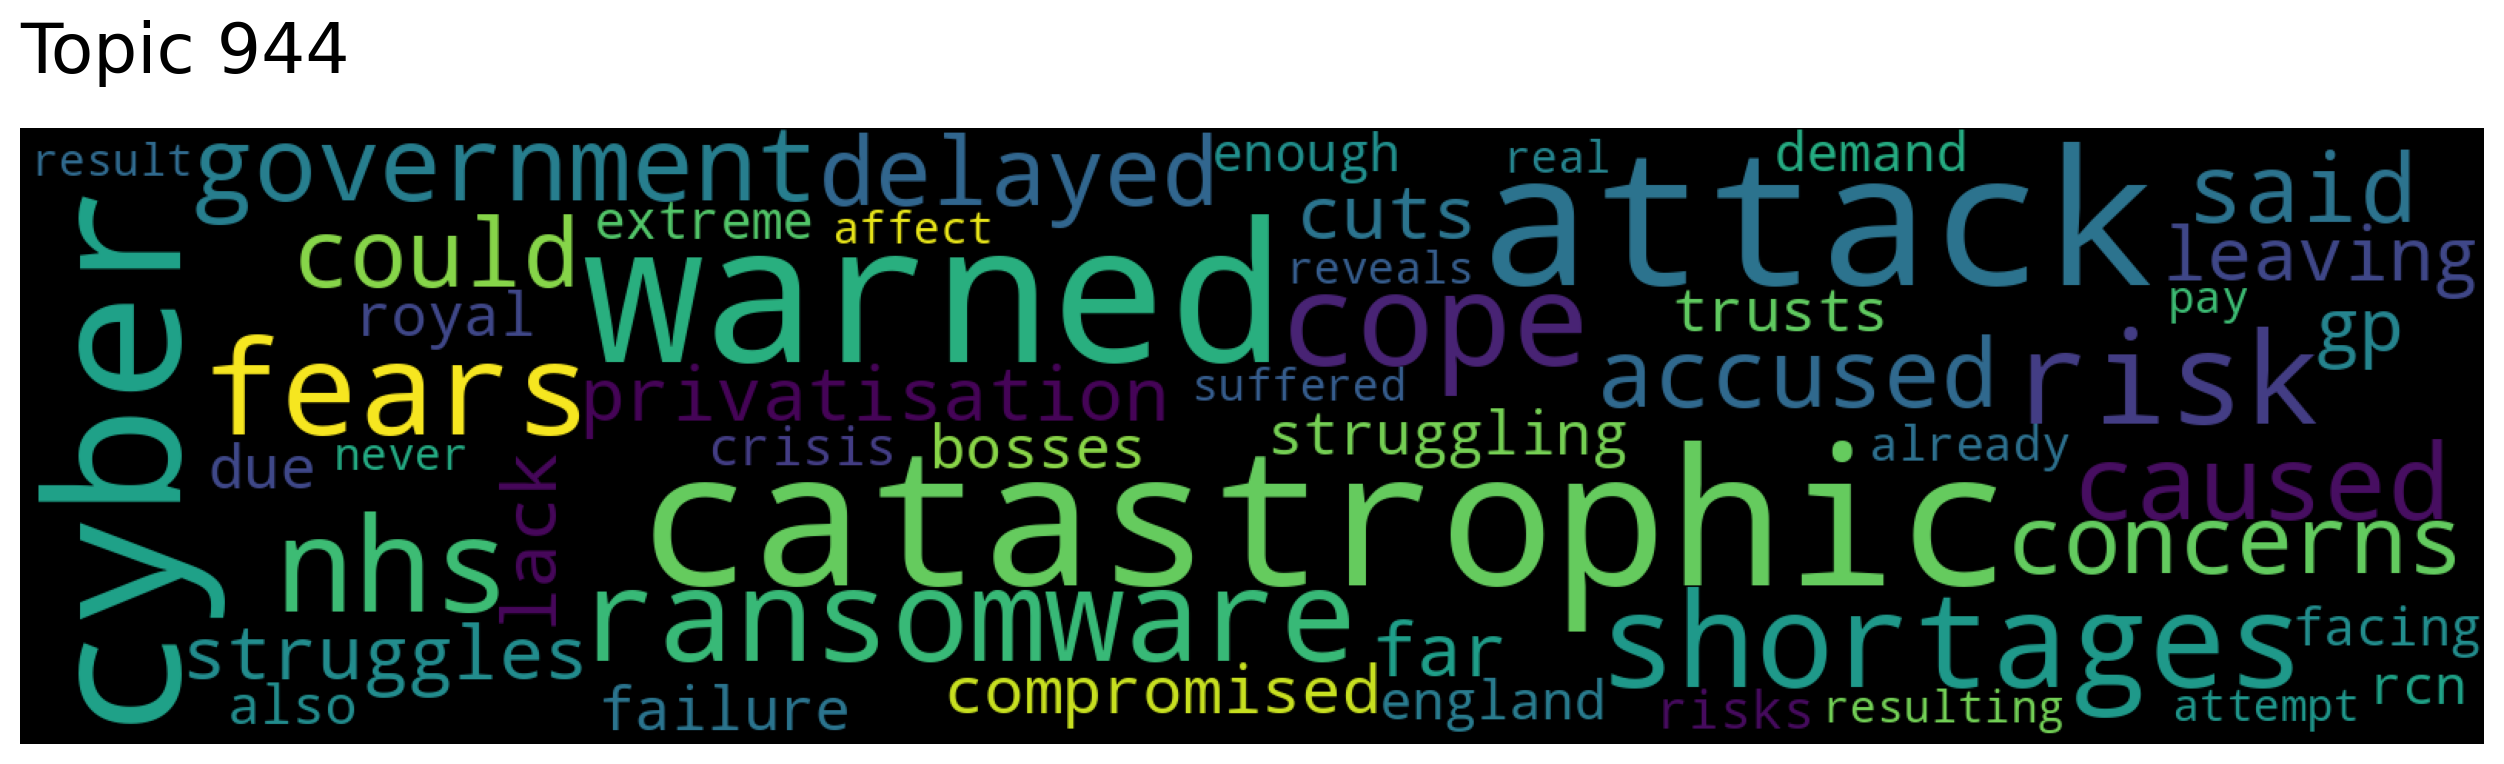

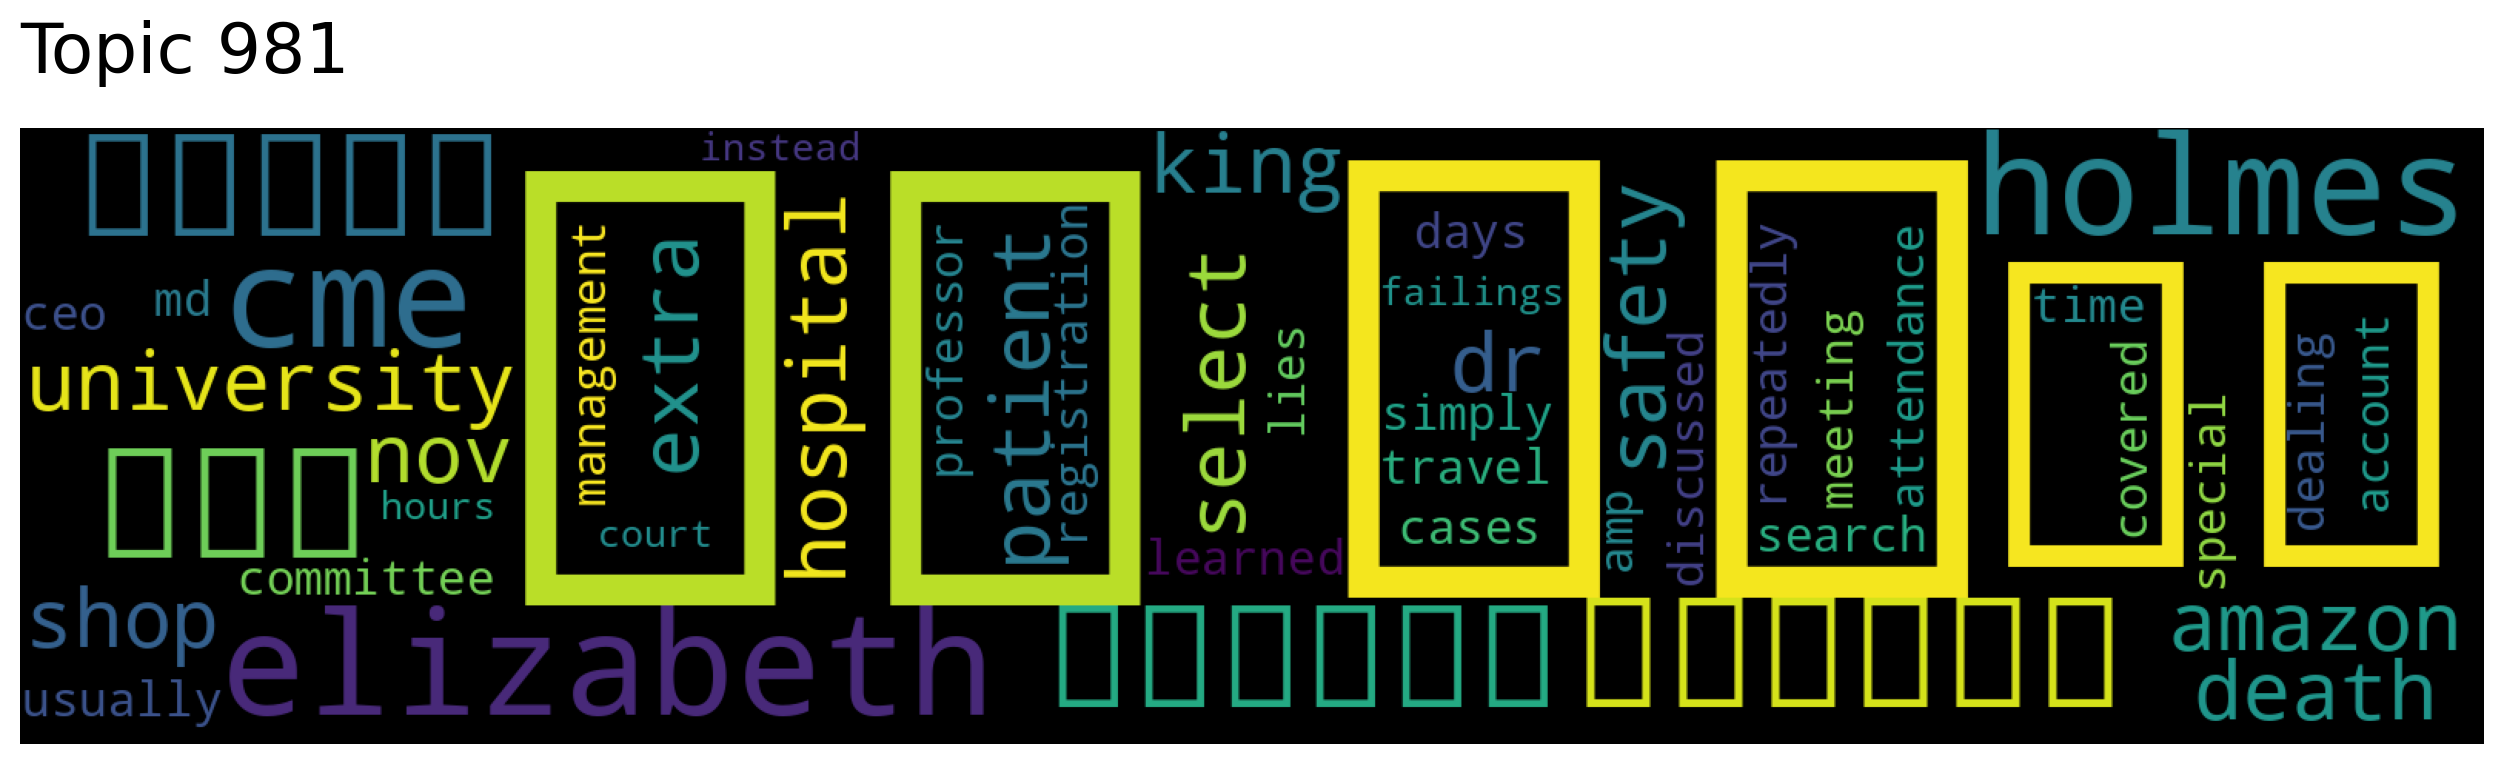

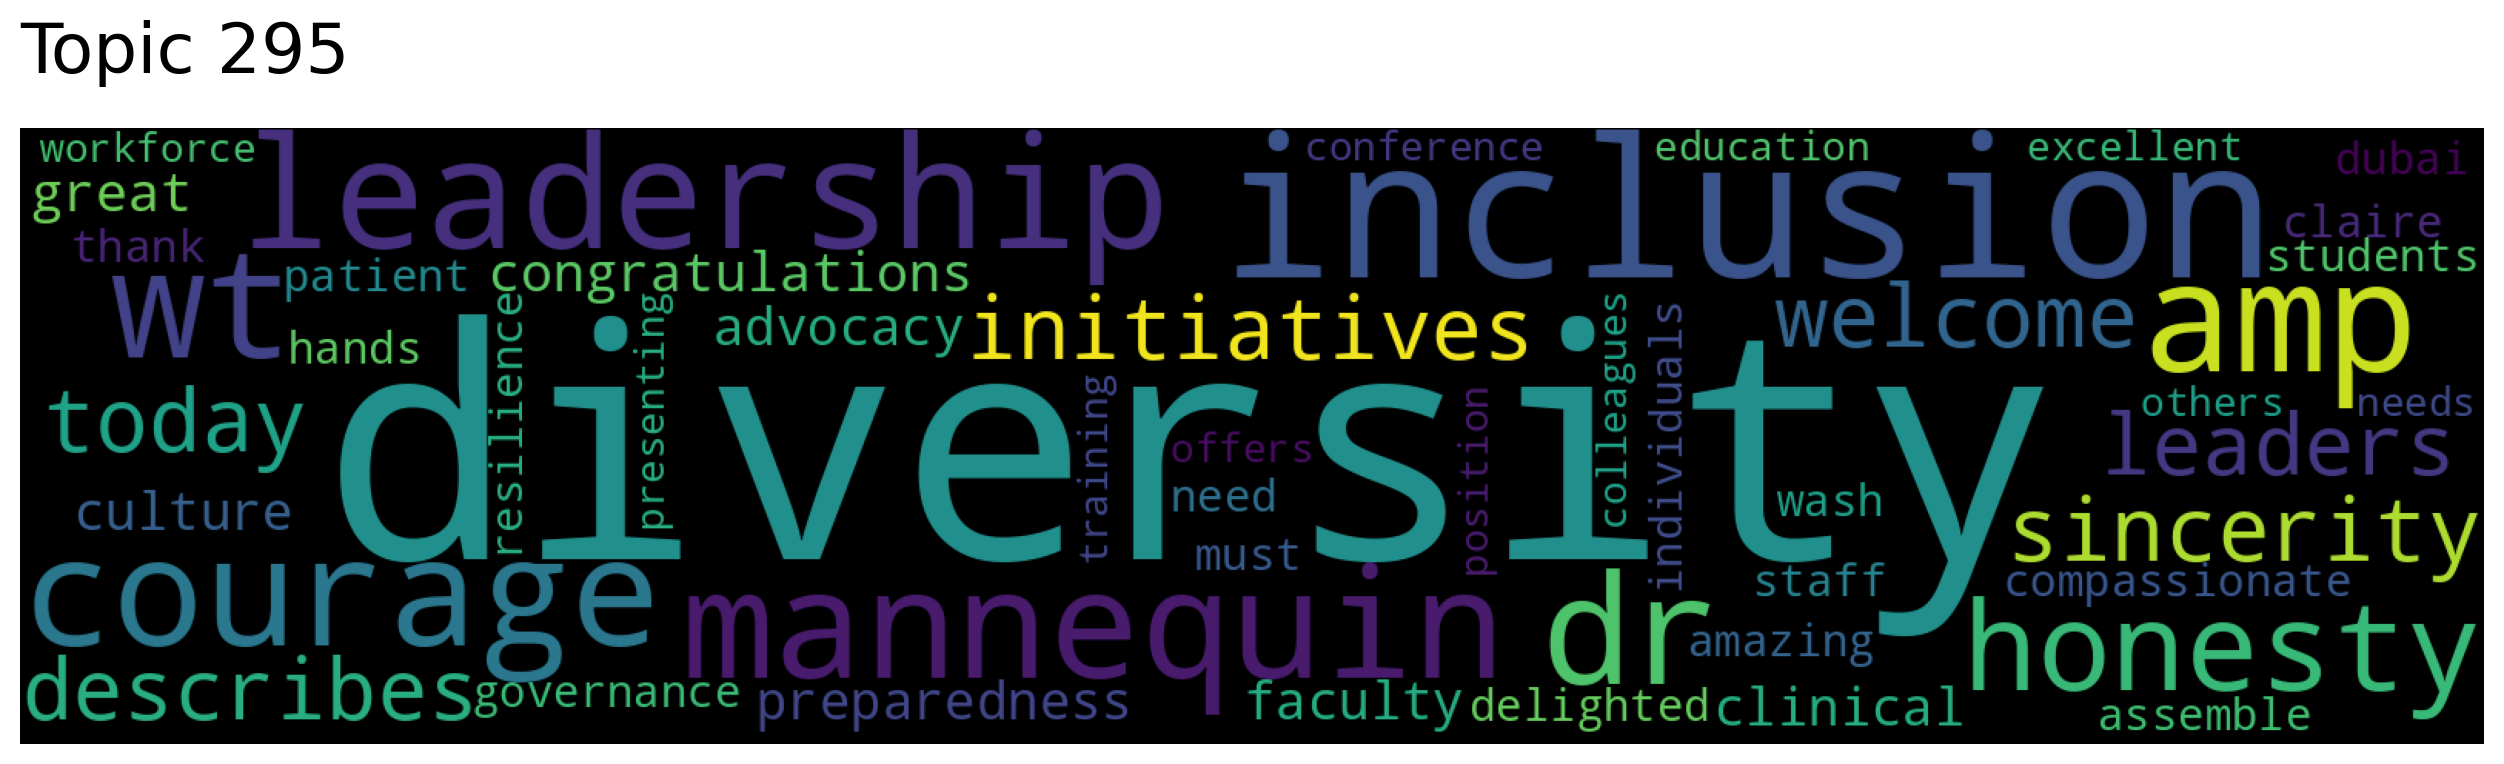

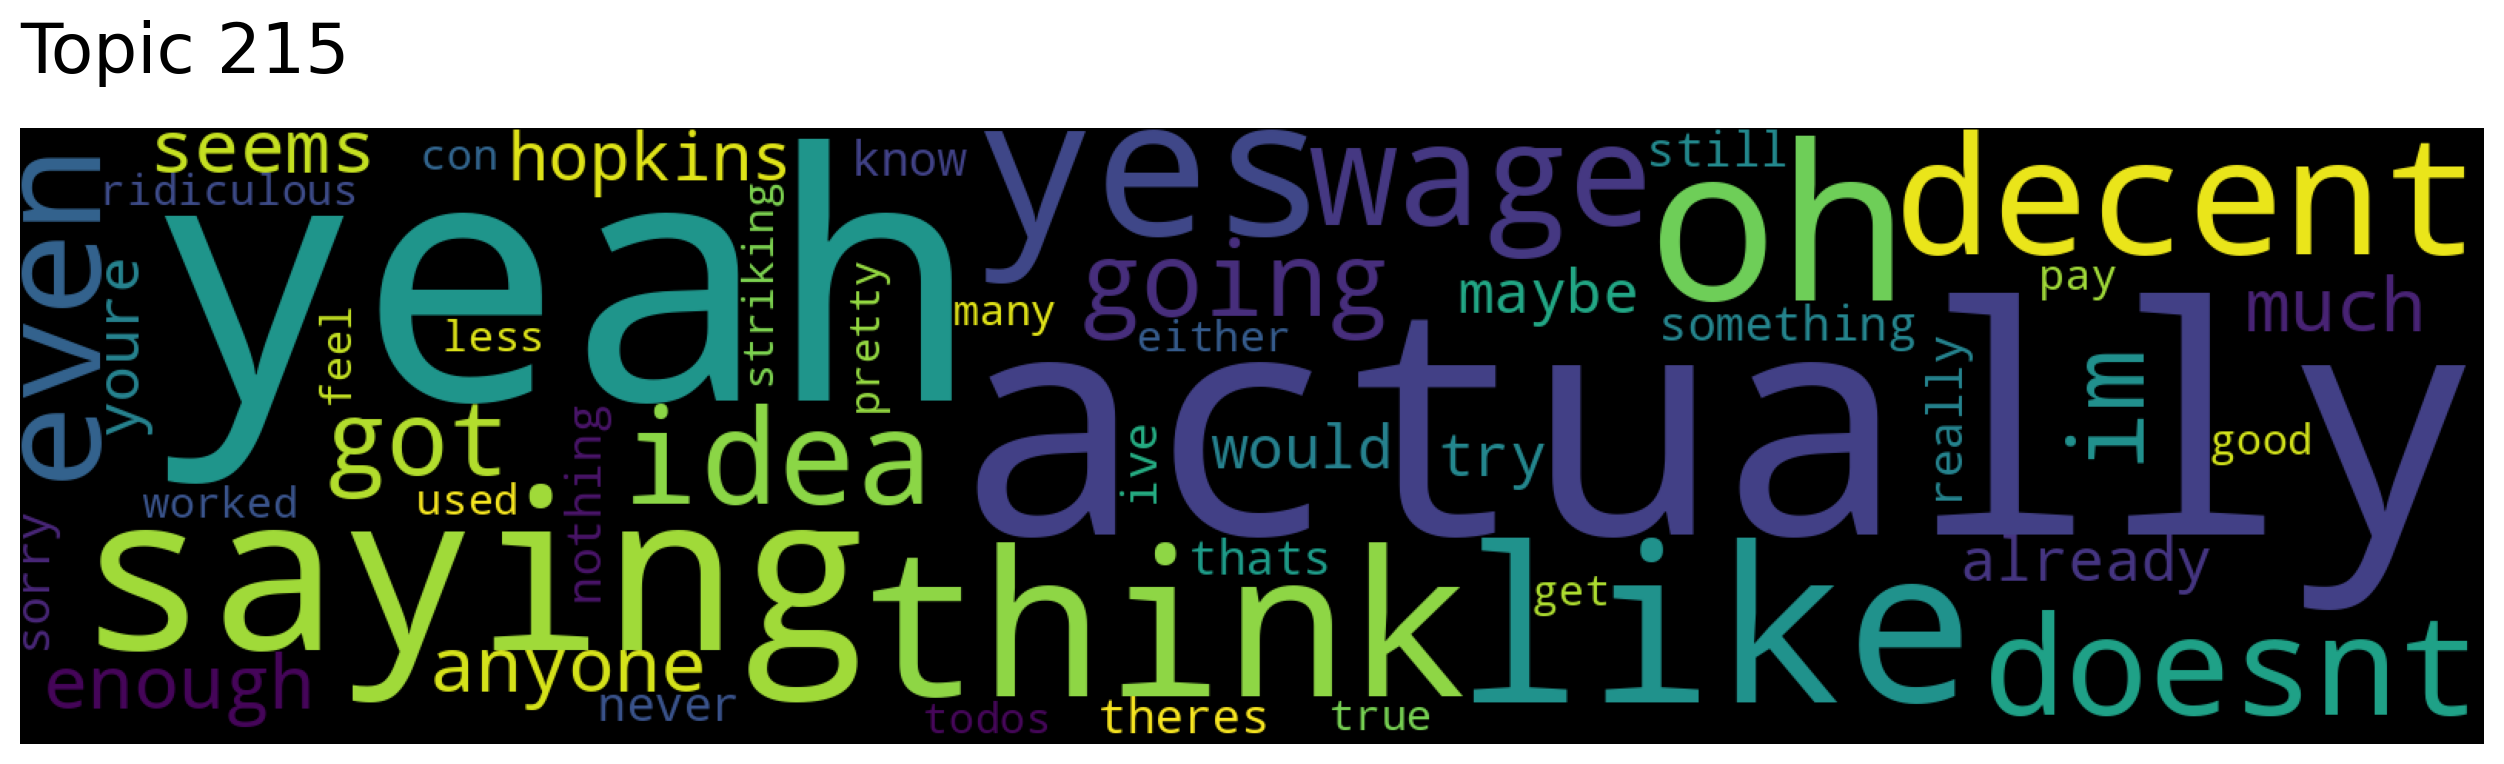

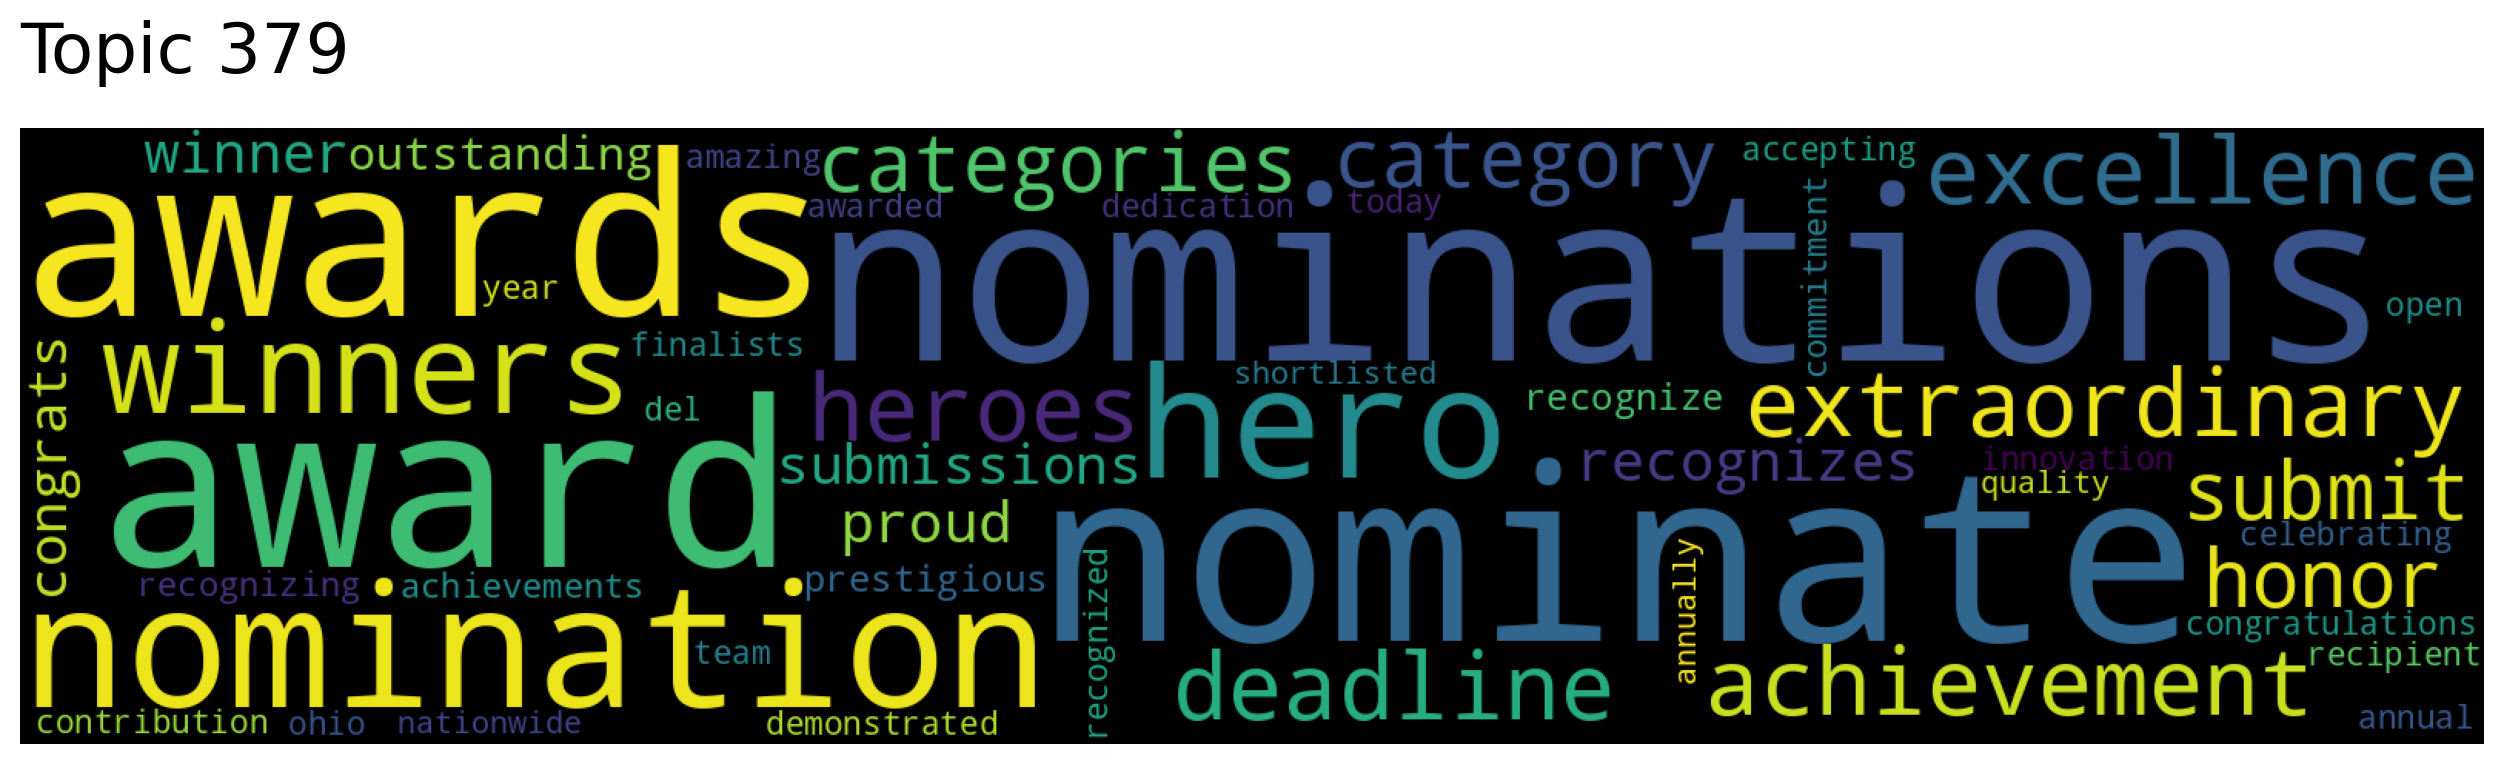

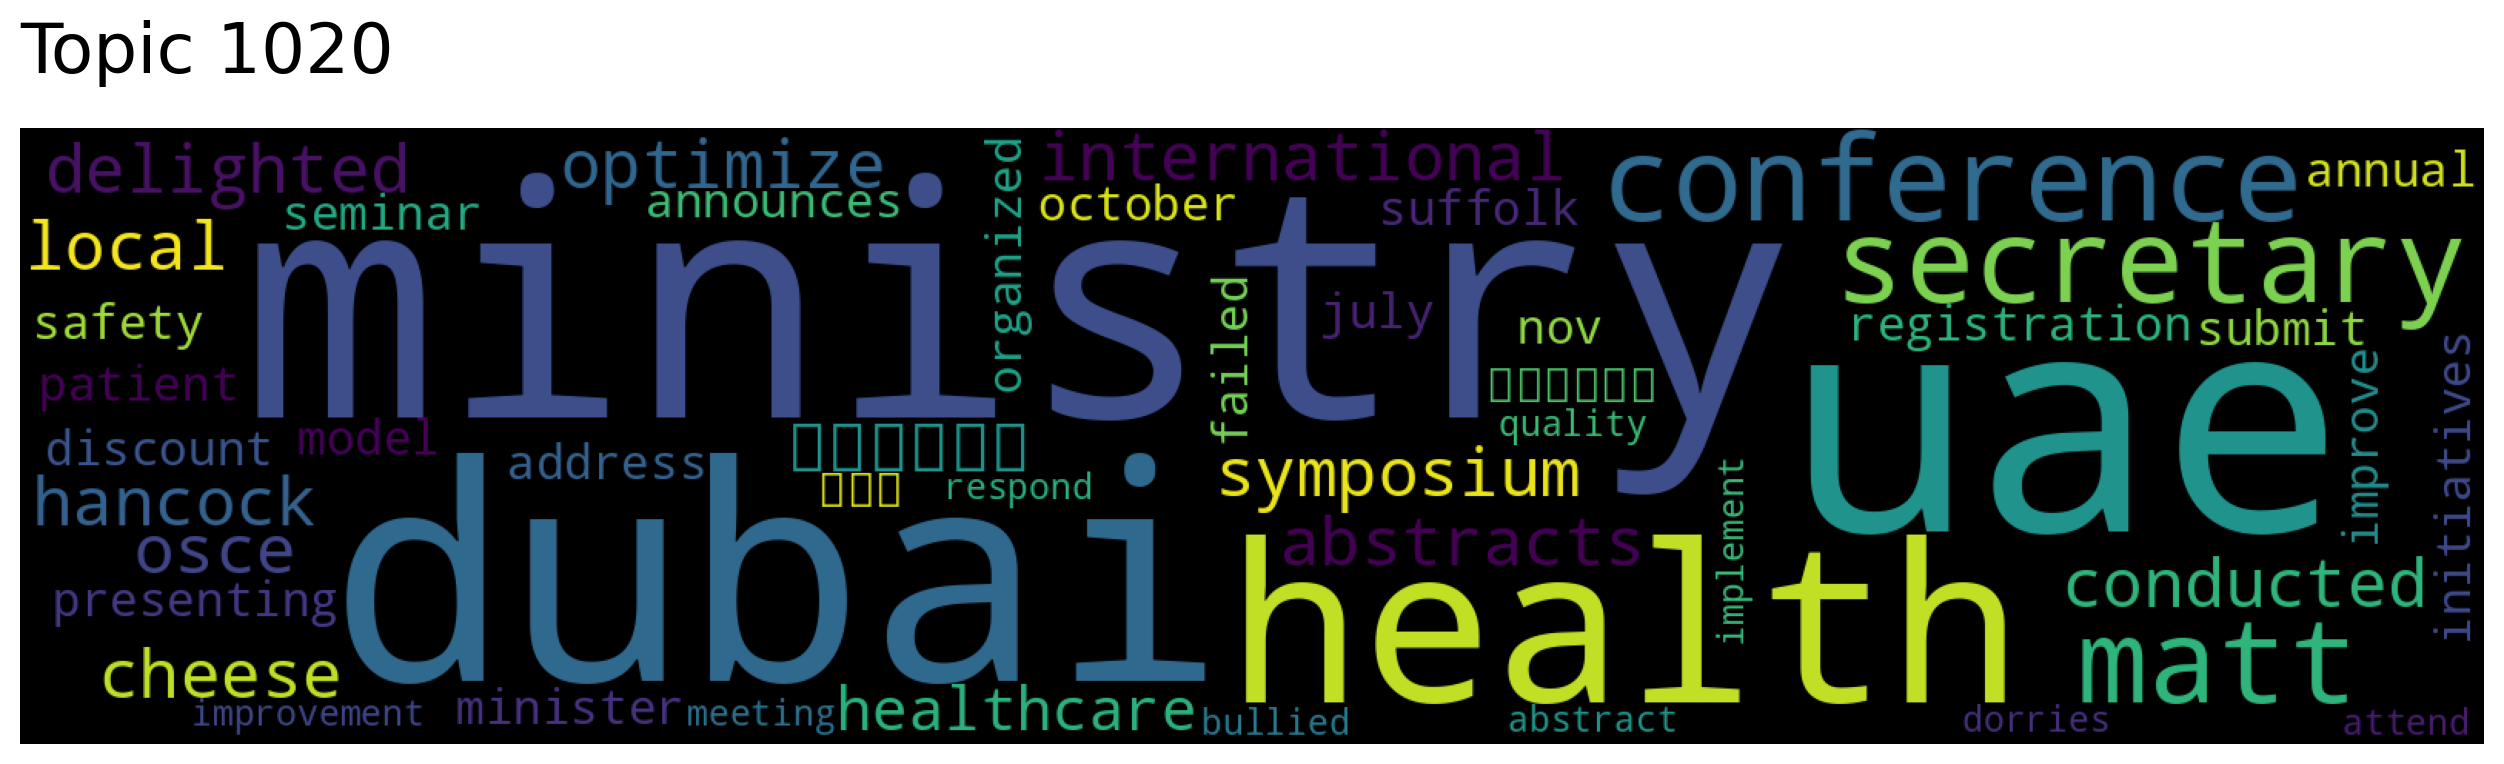

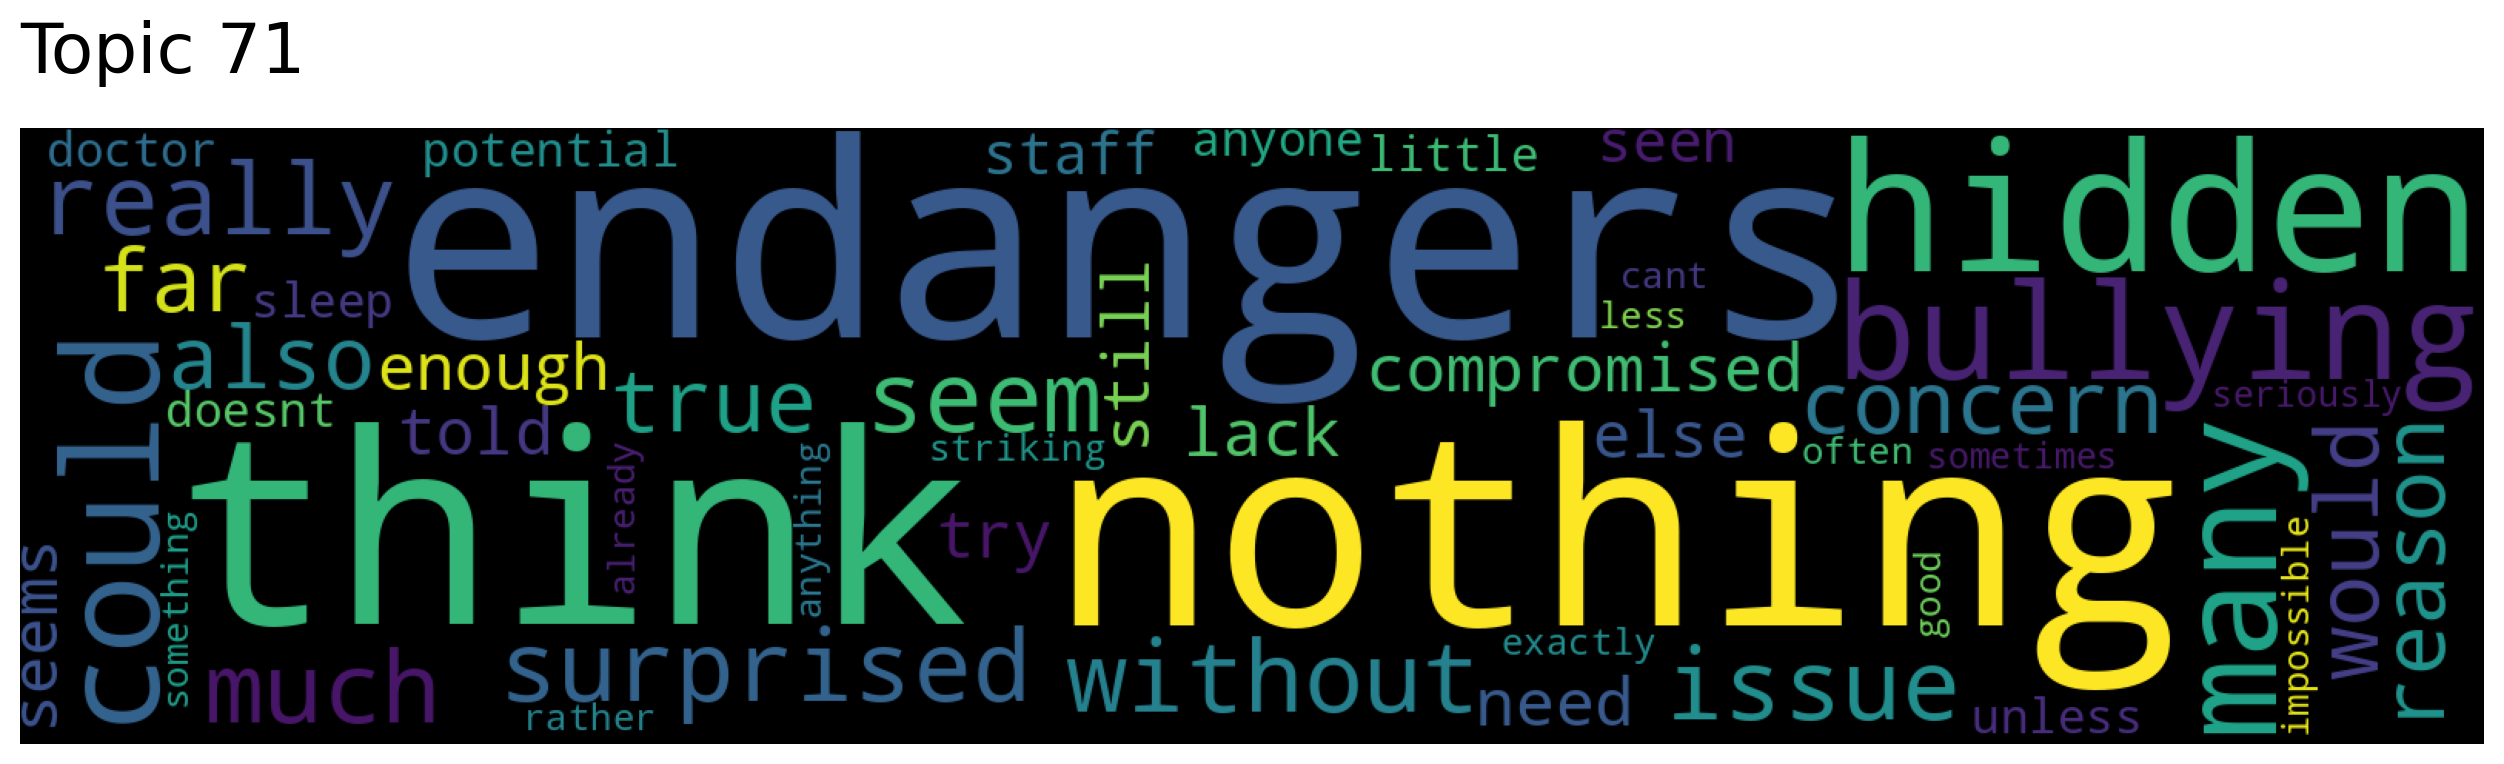

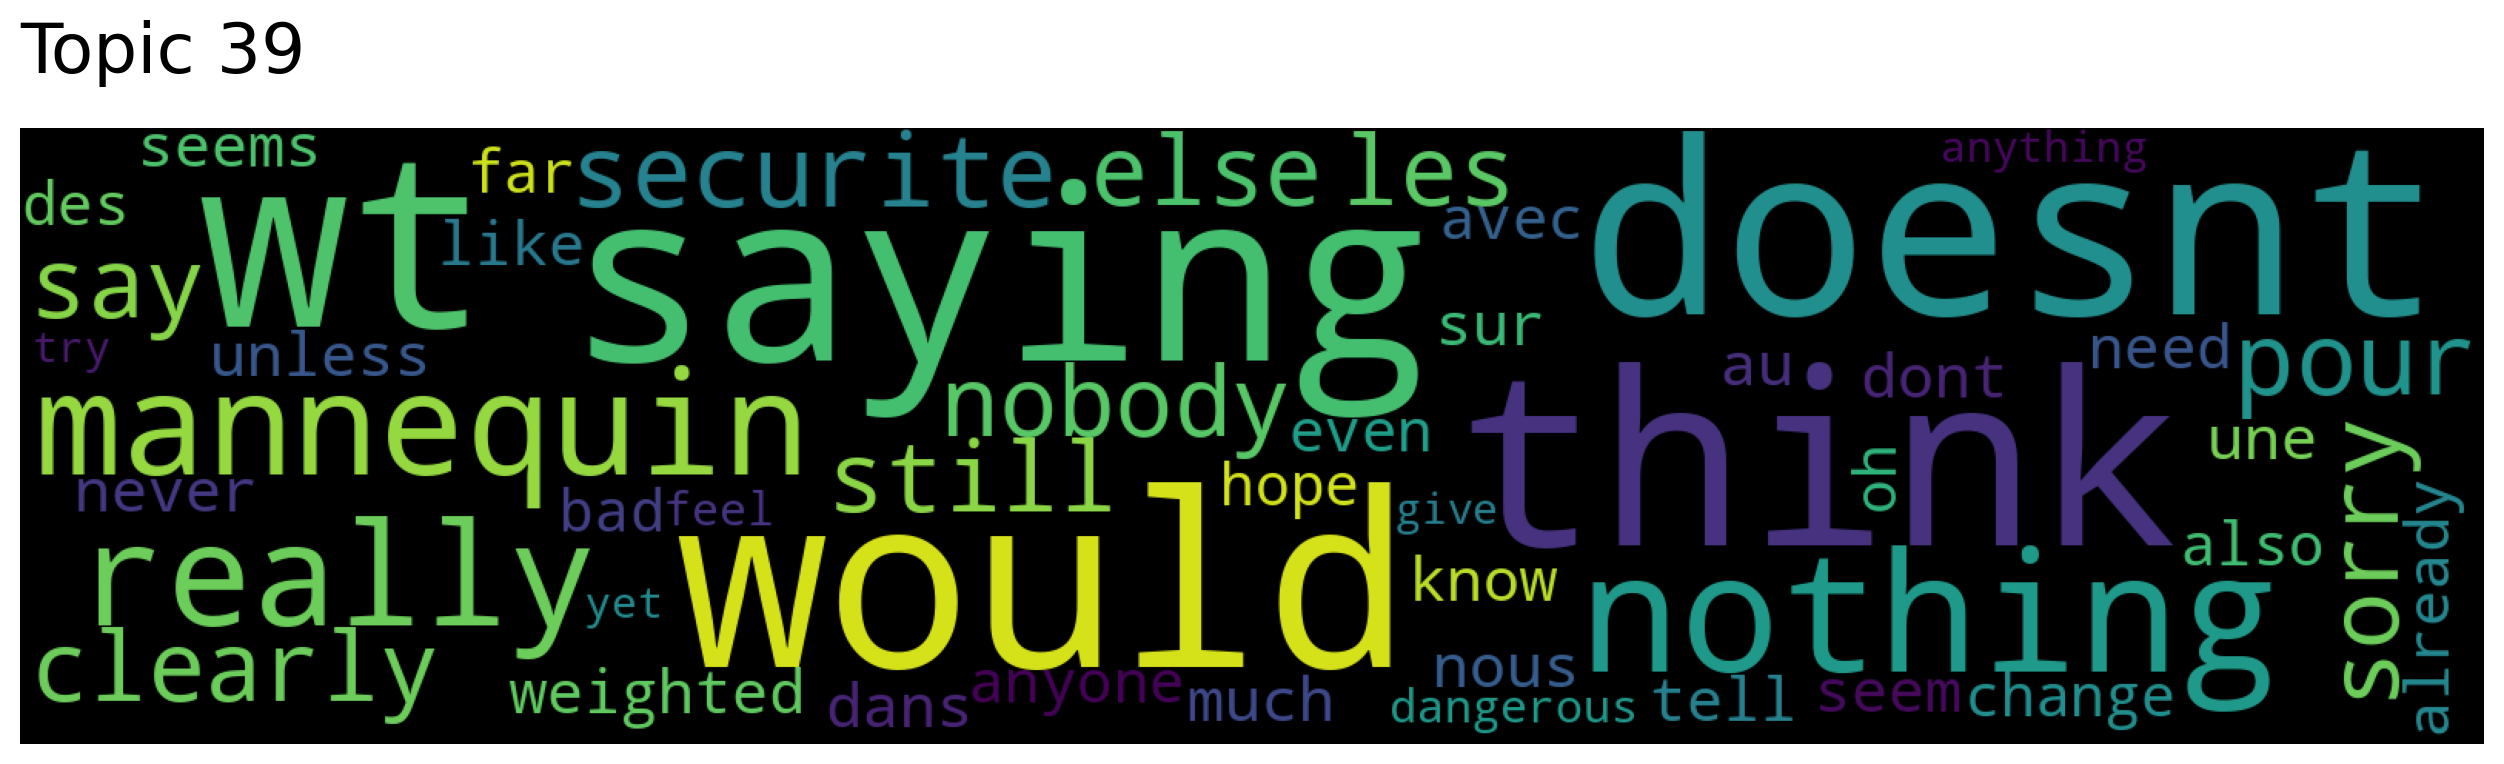

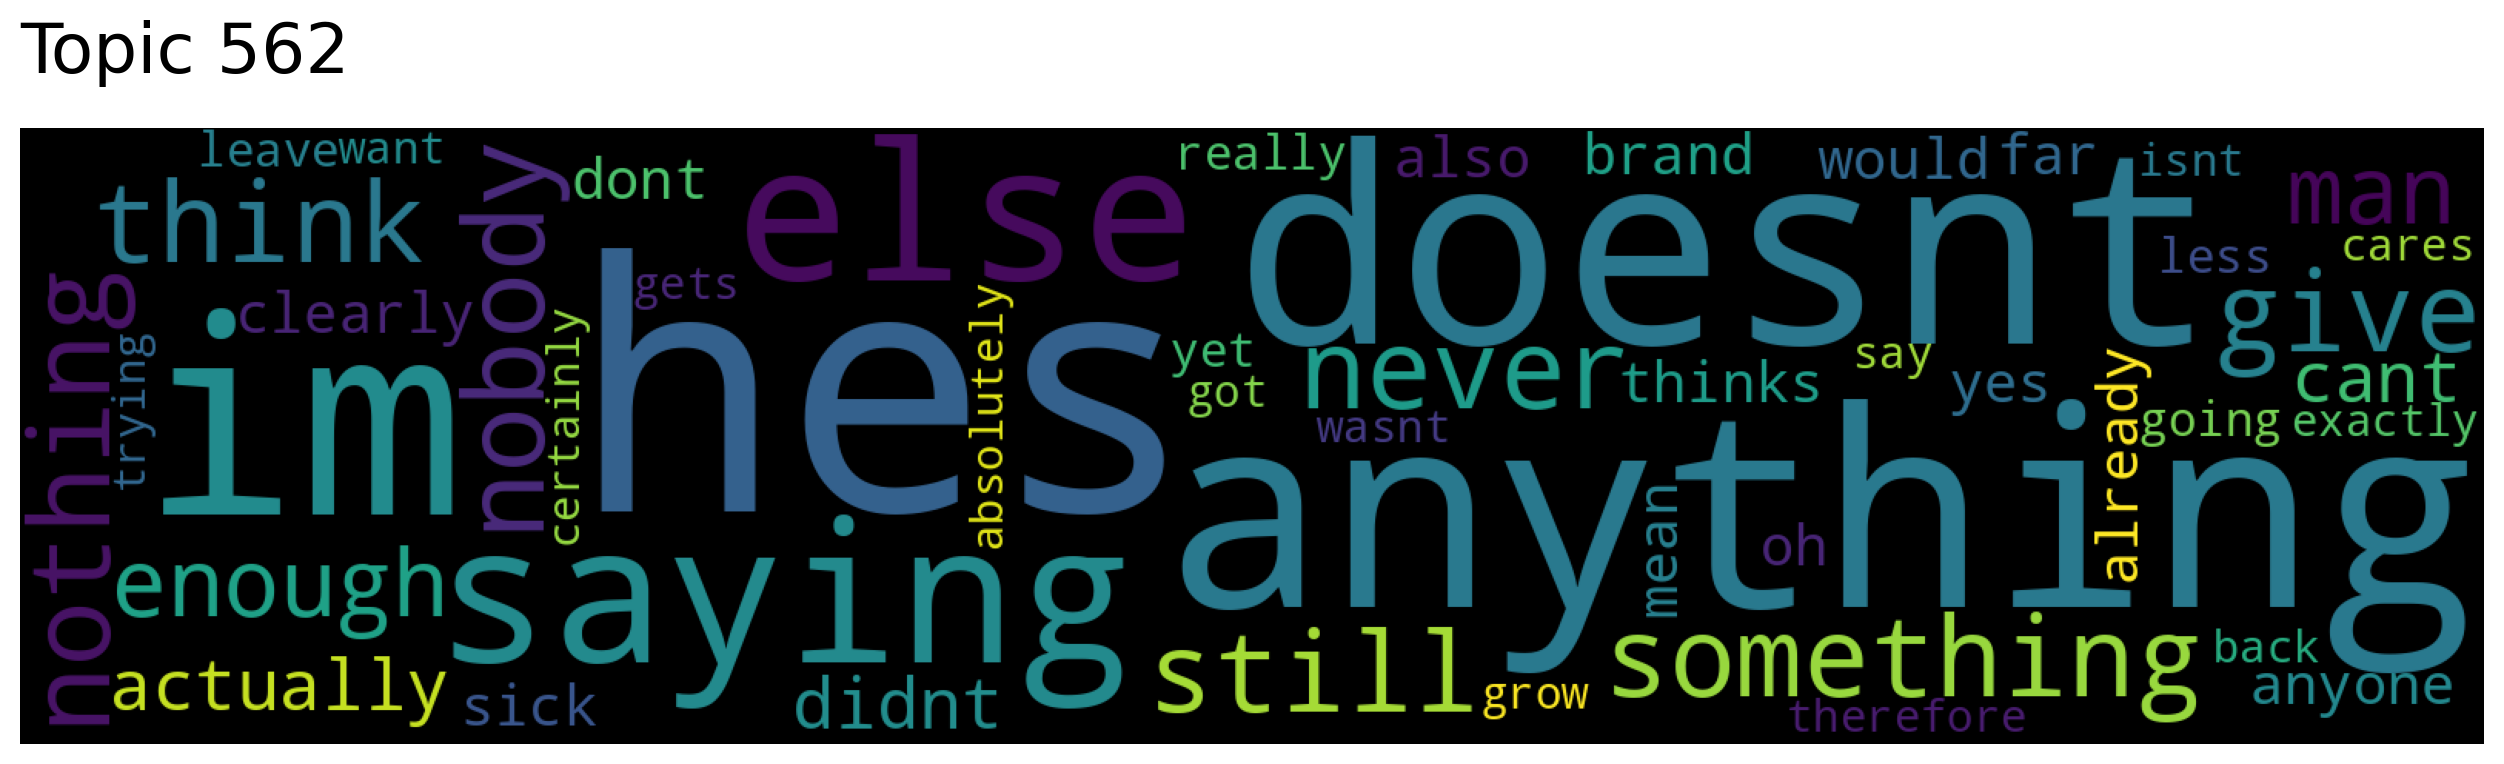

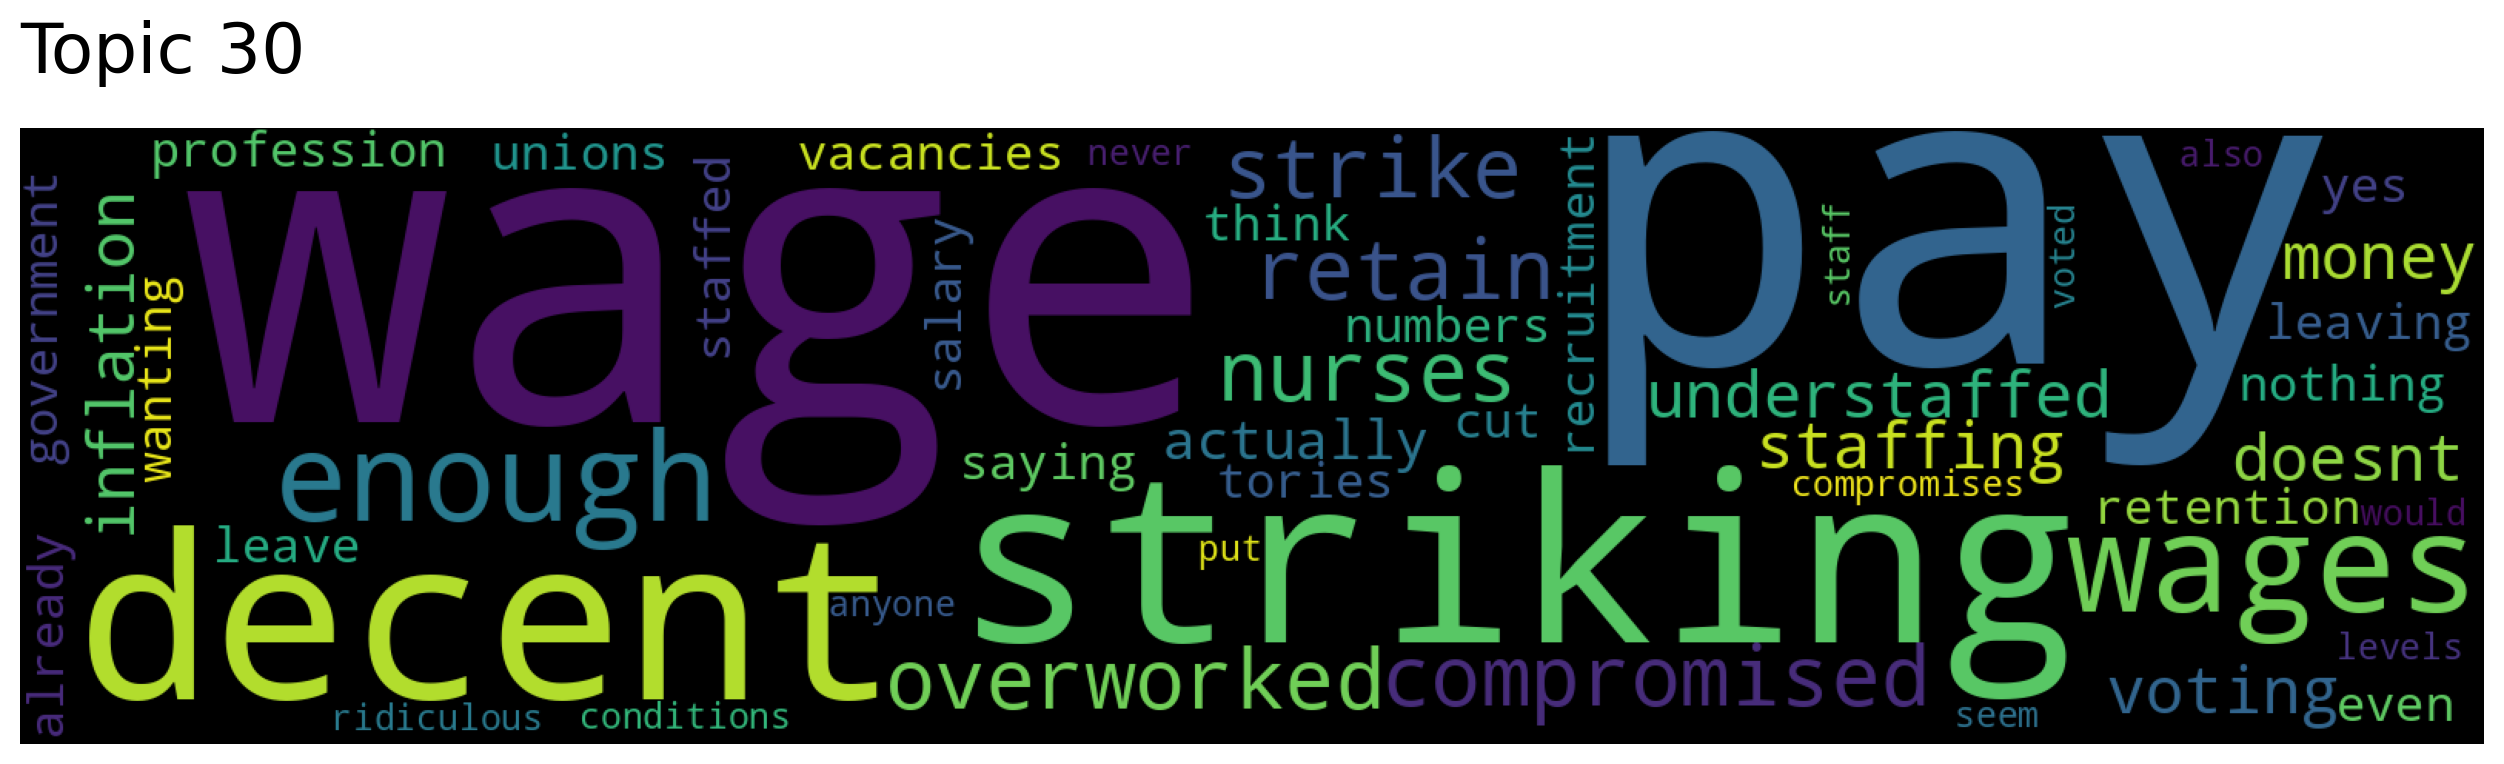

In [66]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["safety"], num_topics=10)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

### Search Documents by Topic

In [67]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=30, num_docs=5)

In [68]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 13523, Score: 0.8673617243766785
-----------
learning transport patient stretcher
-----------

Document: 75326, Score: 0.8496976494789124
-----------
blue shield california venus williams team address implicit biases healthcare thank
-----------

Document: 20553, Score: 0.8355492353439331
-----------
illegal patient safety becomes issue
-----------

Document: 28852, Score: 0.8001000285148621
-----------
scotland amp uk wild west aesthetic medicine money patient safety
-----------

Document: 75720, Score: 0.7950529456138611
-----------
manufacturers aesthetic devices regarding annex xvi
-----------



### Semantic Search Documents by Keywords

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["cryptography", "privacy"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

### Similar Keywords

In [ ]:
words, word_scores = model.similar_words(keywords=["space"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")